0               C=C
1               C=O
2               C#N
3               CCO
4          CCC(=O)O
5            CN=C=O
6        C1=CCC=CC1
7       C1=CC=CC=C1
8    C1=C(C)C=CC=C1
9    C1CCC2CCCCC2C1
Name: smiles, dtype: object


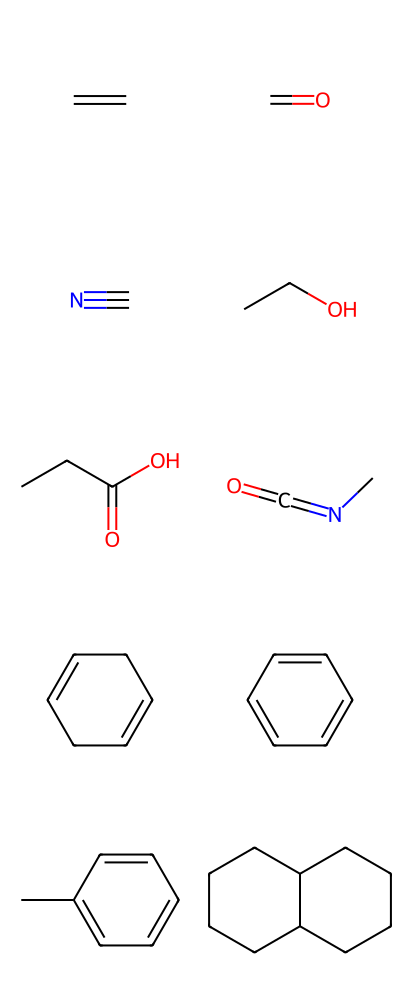

In [1]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
from psikit import Psikit


# read in smiles strings from the first column of 'smiles.csv'
df = pd.read_csv('smiles.csv', header=None, names=['smiles'],skiprows=1)
print(df.smiles)

# Print molecules in grid
mols = [Chem.MolFromSmiles(smi) for smi in df.smiles]
Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(200, 200))

In [2]:
df

smiles
0             C=C
1             C=O
2             C#N
3             CCO
4        CCC(=O)O
5          CN=C=O
6      C1=CCC=CC1
7     C1=CC=CC=C1
8  C1=C(C)C=CC=C1
9  C1CCC2CCCCC2C1

In [3]:
file_name = 'smiles.csv'

with open(file_name, "r") as ins:
    smiles = []
    for line in ins:
        smiles.append(line.split('\n')[0])
print('# of SMILES:', len(smiles))
print(smiles)

# of SMILES: 11
['smiles', 'C=C', 'C=O', 'C#N', 'CCO', 'CCC(=O)O', 'CN=C=O', 'C1=CCC=CC1', 'C1=CC=CC=C1', 'C1=C(C)C=CC=C1', 'C1CCC2CCCCC2C1']


In [4]:
# enables using RDKit molecules as columns of a Pandas Dataframe
from rdkit.Chem import PandasTools
print(df.head(1))
# Add ROMol to Pandas Dataframe.
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='smiles')

  smiles
0    C=C


smiles                                             ROMol
0             C=C  <rdkit.Chem.rdchem.Mol object at 0x14ba9a75aac0>
1             C=O  <rdkit.Chem.rdchem.Mol object at 0x14ba9b734c80>
2             C#N  <rdkit.Chem.rdchem.Mol object at 0x14ba9b734dd0>
3             CCO  <rdkit.Chem.rdchem.Mol object at 0x14ba9b734f20>
4        CCC(=O)O  <rdkit.Chem.rdchem.Mol object at 0x14ba9b74d120>
5          CN=C=O  <rdkit.Chem.rdchem.Mol object at 0x14ba9b74d190>
6      C1=CCC=CC1  <rdkit.Chem.rdchem.Mol object at 0x14ba9b74d200>
7     C1=CC=CC=C1  <rdkit.Chem.rdchem.Mol object at 0x14ba9b74d270>
8  C1=C(C)C=CC=C1  <rdkit.Chem.rdchem.Mol object at 0x14ba9b74d2e0>
9  C1CCC2CCCCC2C1  <rdkit.Chem.rdchem.Mol object at 0x14ba9b74d350>
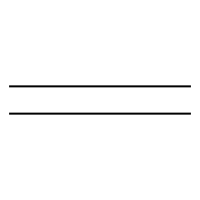
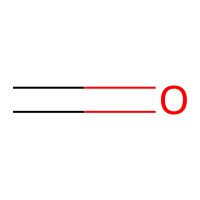
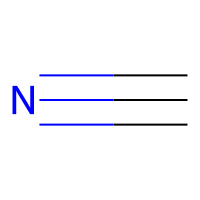
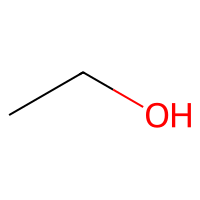
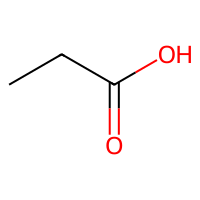
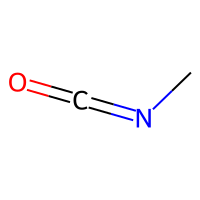
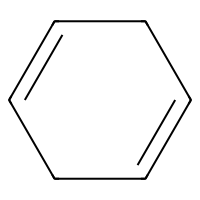
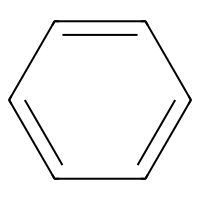
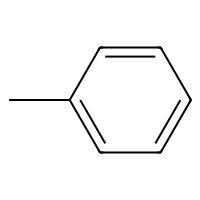
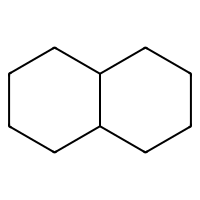

In [5]:
PandasTools.ChangeMoleculeRendering(df)
df

In [6]:
PandasTools.RenderImagesInAllDataFrames(images=True)

smiles                                             ROMol
0             C=C  <rdkit.Chem.rdchem.Mol object at 0x14ba9a75aac0>
1             C=O  <rdkit.Chem.rdchem.Mol object at 0x14ba9b734c80>
2             C#N  <rdkit.Chem.rdchem.Mol object at 0x14ba9b734dd0>
3             CCO  <rdkit.Chem.rdchem.Mol object at 0x14ba9b734f20>
4        CCC(=O)O  <rdkit.Chem.rdchem.Mol object at 0x14ba9b74d120>
5          CN=C=O  <rdkit.Chem.rdchem.Mol object at 0x14ba9b74d190>
6      C1=CCC=CC1  <rdkit.Chem.rdchem.Mol object at 0x14ba9b74d200>
7     C1=CC=CC=C1  <rdkit.Chem.rdchem.Mol object at 0x14ba9b74d270>
8  C1=C(C)C=CC=C1  <rdkit.Chem.rdchem.Mol object at 0x14ba9b74d2e0>
9  C1CCC2CCCCC2C1  <rdkit.Chem.rdchem.Mol object at 0x14ba9b74d350>
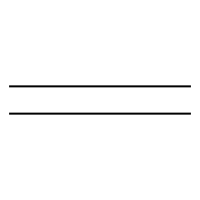
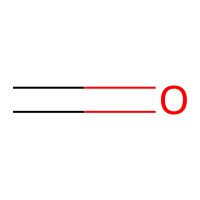
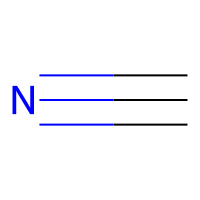
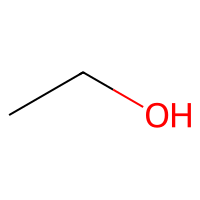
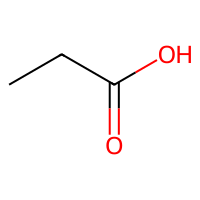
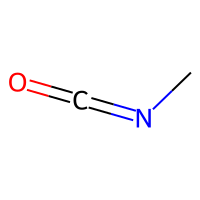
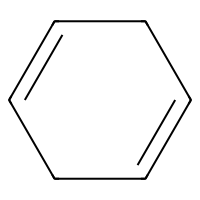
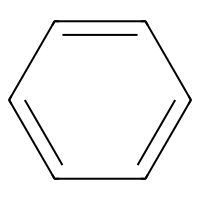
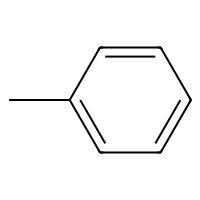
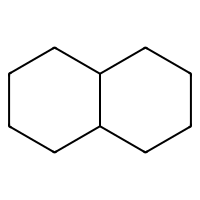

In [7]:
df

# Add a column for numbers of atoms

In [8]:
# Draw the structures in grid.
PandasTools.FrameToGridImage(df.head(8), legendsCol="smiles", molsPerRow=4)

# Adding new columns of properites use Pandas map method.
df["n_Atoms"] = df['ROMol'].map(lambda x: x.GetNumAtoms())
# df.head(1)

smiles                                             ROMol  n_Atoms
0             C=C  <rdkit.Chem.rdchem.Mol object at 0x14ba9a75aac0>        2
1             C=O  <rdkit.Chem.rdchem.Mol object at 0x14ba9b734c80>        2
2             C#N  <rdkit.Chem.rdchem.Mol object at 0x14ba9b734dd0>        2
3             CCO  <rdkit.Chem.rdchem.Mol object at 0x14ba9b734f20>        3
4        CCC(=O)O  <rdkit.Chem.rdchem.Mol object at 0x14ba9b74d120>        5
5          CN=C=O  <rdkit.Chem.rdchem.Mol object at 0x14ba9b74d190>        4
6      C1=CCC=CC1  <rdkit.Chem.rdchem.Mol object at 0x14ba9b74d200>        6
7     C1=CC=CC=C1  <rdkit.Chem.rdchem.Mol object at 0x14ba9b74d270>        6
8  C1=C(C)C=CC=C1  <rdkit.Chem.rdchem.Mol object at 0x14ba9b74d2e0>        7
9  C1CCC2CCCCC2C1  <rdkit.Chem.rdchem.Mol object at 0x14ba9b74d350>       10
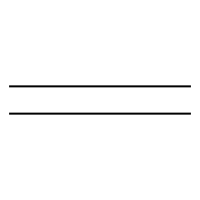
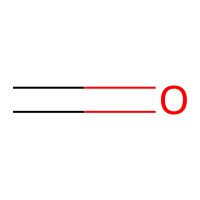
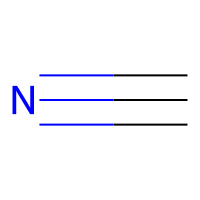
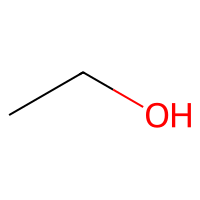
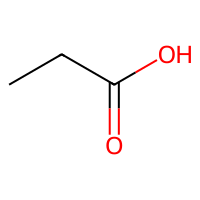
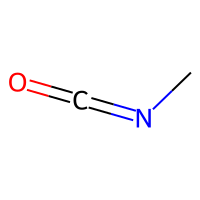
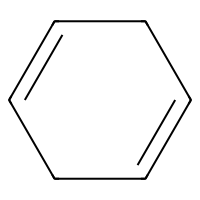
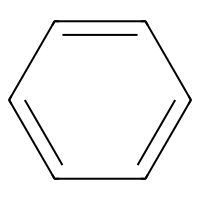
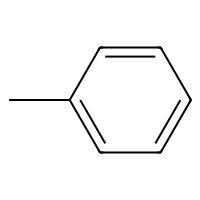
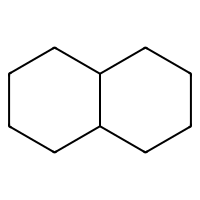

In [9]:
df

# Energy Calculation

In [10]:
import numpy as np
import time
energy_data = []
cpu_time_data = []
%time
for smi in df.smiles:
    pk=Psikit(debug=True,threads=1,memory=18)
    pk.read_from_smiles(smi)
    time_i = time.time()
    energy=pk.optimize()
    time_f = time.time()
    print("Optimized SCF Energy for",smi,":", energy)
    energy_data=np.append(energy_data,energy)
    cpu_time_data=np.append(cpu_time_data, time_f - time_i)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 4.29 µs

  Memory set to  16.764 GiB by Python driver.
  Threads set to 1 by Python driver.
Optimizer: Optimization complete!
Optimized SCF Energy for C=C : -78.03876941254534
Optimizer: Optimization complete!
Optimized SCF Energy for C=O : -113.86953646696564
Optimizer: Optimization complete!
Optimized SCF Energy for C#N : -92.87694247778018
Optimizer: Optimization complete!
Optimized SCF Energy for CCO : -154.08991870724765
Optimizer: Optimization complete!
Optimized SCF Energy for CCC(=O)O : -266.85898515790296
Optimizer: Optimization complete!
Optimized SCF Energy for CN=C=O : -206.79559264403252
Optimizer: Optimization complete!
Optimized SCF Energy for C1=CCC=CC1 : -231.84676156690256
Optimizer: Optimization complete!
Optimized SCF Energy for C1=CC=CC=C1 : -230.71352354231627
Optimizer: Optimization complete!
Optimized SCF Energy for C1=C(C)C=CC=C1 : -269.7535521667374
Optimizer: Optimization complete!
Optimized SCF Energy f

# Add Energy and CPU time columns

[ -78.03876941 -113.86953647  -92.87694248 -154.08991871 -266.85898516
 -206.79559264 -231.84676157 -230.71352354 -269.75355217 -389.20484225]
[ 2.02714205  1.4104414   1.26354527  5.33223248 22.06215549  7.41405892
 21.72283602  7.06962609 16.62378168 69.26782656]


smiles                                             ROMol  n_Atoms  \
0             C=C  <rdkit.Chem.rdchem.Mol object at 0x14ba9a75aac0>        2   
1             C=O  <rdkit.Chem.rdchem.Mol object at 0x14ba9b734c80>        2   
2             C#N  <rdkit.Chem.rdchem.Mol object at 0x14ba9b734dd0>        2   
3             CCO  <rdkit.Chem.rdchem.Mol object at 0x14ba9b734f20>        3   
4        CCC(=O)O  <rdkit.Chem.rdchem.Mol object at 0x14ba9b74d120>        5   
5          CN=C=O  <rdkit.Chem.rdchem.Mol object at 0x14ba9b74d190>        4   
6      C1=CCC=CC1  <rdkit.Chem.rdchem.Mol object at 0x14ba9b74d200>        6   
7     C1=CC=CC=C1  <rdkit.Chem.rdchem.Mol object at 0x14ba9b74d270>        6   
8  C1=C(C)C=CC=C1  <rdkit.Chem.rdchem.Mol object at 0x14ba9b74d2e0>        7   
9  C1CCC2CCCCC2C1  <rdkit.Chem.rdchem.Mol object at 0x14ba9b74d350>       10   

   Energy (Hartree)  CPU time (s)  
0        -78.038769      2.027142  
1       -113.869536      1.410441  
2        -92.876942      1.263545  
3       -154.089919      5.332232  
4       -266.858985     22.062155  
5       -206.795593      7.414059  
6       -231.846762     21.722836  
7       -230.713524      7.069626  
8       -269.753552     16.623782  
9       -389.204842     69.267827
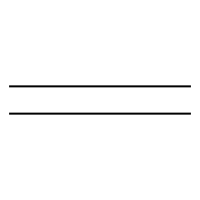
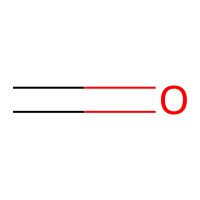
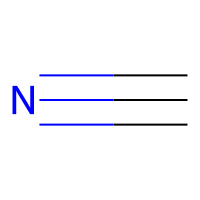
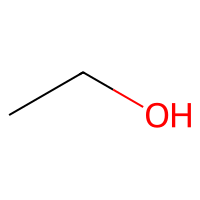
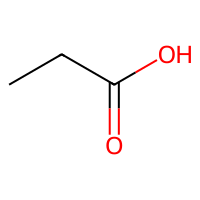
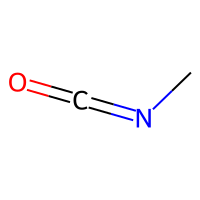
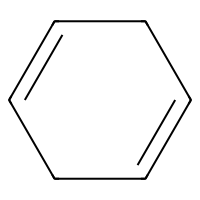
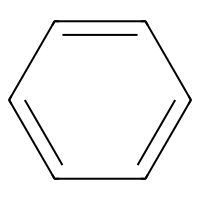
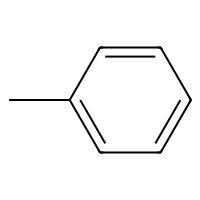
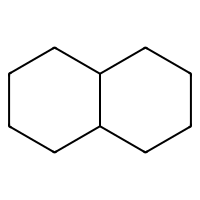

In [11]:
# df["energy"] = [pk.optimize() for smi in df.smiles]
print(energy_data)
print(cpu_time_data)
df["Energy (Hartree)"] = energy_data
df["CPU time (s)"] = cpu_time_data
df

In [12]:
# save the dataframe to a csv file
df.to_csv('energy_table_updated.csv')